In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data_final = pd.read_csv('data/data_final.txt', sep='\t')

C:\Users\simacri\AppData\Local\Temp\ipykernel_4396\2087527005.py:1: DtypeWarning: Columns (3450,3451,3454,3455,3456,3458,3461,3462,3463,3464,3465,3466,3468,3475,3478) have mixed types. Specify dtype option on import or set low_memory=False.
  data_final = pd.read_csv('data/data_final.txt', sep='\t')


In [3]:
data_final

,AKAP9_mut,AKT1_mut,AKT2_mut,ALK_mut,APC_mut,ARID1A_mut,ARID1B_mut,ARID2_mut,ASXL1_mut,ASXL2_mut,...,CANCER_TYPE_DETAILED,ER_STATUS,HER2_STATUS,GRADE,ONCOTREE_CODE,PR_STATUS,SAMPLE_TYPE,TUMOR_SIZE,TUMOR_STAGE,TMB_NONSYNONYMOUS
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Breast Invasive Ductal Carcinoma,Positive,Negative,3.0,IDC,Positive,Primary,10.0,1.0,2.615035
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Breast Invasive Ductal Carcinoma,Positive,Negative,2.0,IDC,Positive,Primary,15.0,2.0,2.615035
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Breast Mixed Ductal and Lobular Carcinoma,Positive,Negative,2.0,MDLC,Positive,Primary,25.0,2.0,1.307518
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Breast Mixed Ductal and Lobular Carcinoma,Positive,Negative,3.0,MDLC,Positive,Primary,40.0,2.0,2.615035
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Breast Invasive Ductal Carcinoma,Positive,Negative,3.0,IDC,Positive,Primary,31.0,4.0,5.230071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Breast Invasive Ductal Carcinoma,Positive,Positive,2.0,IDC,Negative,Primary,20.0,NaN,0.000000
2478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Breast Invasive Ductal Carcinoma,Positive,Negative,2.0,IDC,Positive,Primary,22.0,NaN,0.000000
2479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Breast Invasive Ductal Carcinoma,Positive,Negative,2.0,IDC,Positive,Primary,21.0,NaN,0.000000
2480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Invasive Breast Carcinoma,Positive,Negative,3.0,BRCA,Positive,Primary,130.0,NaN,0.000000


# selection mut and cna

In [54]:
data =  data_final.copy()
l = ['rna'] #['mut','cna','rna','meth']

### filter rows
row_string = l[0]+'==True'   
for i in range(1,len(l)):
    row_string = row_string+' and '+l[i]+'==True'

### filter cols
col_list = ['CANCER_TYPE_DETAILED'] + [col for col in data if col.endswith('_'+l[0])]
for i in range(1,len(l)):
    col_list = col_list + [col for col in data if col.endswith('_'+l[i])]
    
data = data.query(row_string)
data = data[col_list]

data

,CANCER_TYPE_DETAILED,PML_rna,TAF15_rna,RPS24_rna,IL21R_rna,ATG10_rna,CREB3L2_rna,FUBP1_rna,BIRC6_rna,SLC14A2_rna,...,ID3_rna,STXBP4_rna,SRRM2_rna,EPAS1_rna,DDX5_rna,ECHDC1_rna,ROBO2_rna,GNA11_rna,ELANE_rna,CSMD3_rna
0,Breast Invasive Ductal Carcinoma,-1.0632,-1.9052,-1.5230,-0.3093,0.0543,0.5224,0.8559,1.3812,0.8583,...,-0.4548,-1.3329,-0.0869,-1.9453,-1.6341,-0.6377,0.0019,-0.1224,0.3828,-0.4459
1,Breast Invasive Ductal Carcinoma,-1.9965,-2.2217,-0.7004,-0.4964,-1.3854,-0.5385,-0.4396,-0.3065,-0.9879,...,1.3809,-1.5065,-2.1733,-0.5108,-0.5932,4.0548,1.8196,-0.5416,-1.9646,-0.1605
2,Breast Mixed Ductal and Lobular Carcinoma,-1.6033,-0.6560,0.6743,-0.0802,-0.8654,-1.5760,-0.0554,1.9651,-2.5806,...,0.2212,-0.7614,-1.7993,-0.4522,0.0020,4.2788,-0.3913,-1.3203,-1.5780,-0.4374
3,Breast Mixed Ductal and Lobular Carcinoma,-0.9805,-1.2324,0.8818,-0.6445,-1.2424,-1.4443,1.1169,-0.7858,-0.1137,...,0.3543,-0.7236,-0.3540,-0.6805,-0.2112,0.1196,-0.0822,-1.3507,-0.4776,-0.2934
4,Breast Invasive Ductal Carcinoma,-1.3850,-0.8762,0.9915,-0.4627,-0.5432,-0.6473,1.2446,0.1827,-0.5342,...,-0.1972,0.4989,0.9168,-0.8557,-0.0759,-0.8855,-0.5000,-0.2892,-1.0444,-0.0112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2477,Breast Invasive Ductal Carcinoma,0.1465,0.2292,0.4206,0.0479,0.8274,-0.0976,-0.6835,0.1852,0.3299,...,0.1711,0.6545,-1.2111,0.4706,2.6084,0.2223,-0.4187,-0.2853,-0.4570,-0.2983
2478,Breast Invasive Ductal Carcinoma,0.2263,0.7443,-0.8314,-0.8662,-0.5768,-0.6501,-0.2064,-0.1899,0.3506,...,-0.1433,-0.6358,1.2315,-0.7911,1.1606,-0.4315,0.0981,0.2521,-0.5527,-0.2152
2479,Breast Invasive Ductal Carcinoma,-0.6723,0.2390,-0.8088,-0.0975,0.1860,-0.4476,-0.8034,-1.4405,0.2766,...,1.2155,-0.7466,0.0286,0.1485,-0.0558,0.3423,0.0945,0.1529,-0.8514,-0.2603
2480,Invasive Breast Carcinoma,-0.1572,-0.5648,-0.1958,-1.0963,-0.0145,-0.5450,1.9245,-0.2851,2.8427,...,-1.8054,1.8516,-0.7680,0.6321,0.5872,-0.0539,-0.5407,-0.1329,1.9074,-0.2131


In [55]:
data.CANCER_TYPE_DETAILED.value_counts()

CANCER_TYPE_DETAILED
Breast Invasive Ductal Carcinoma             1537
Breast Mixed Ductal and Lobular Carcinoma     211
Breast Invasive Lobular Carcinoma             146
Invasive Breast Carcinoma                      42
Breast Invasive Mixed Mucinous Carcinoma       23
Breast                                         17
Metaplastic Breast Cancer                       2
Breast Angiosarcoma                             2
Name: count, dtype: int64

In [56]:
data_new=data[(data['CANCER_TYPE_DETAILED']=='Breast Invasive Ductal Carcinoma') | (data['CANCER_TYPE_DETAILED']=='Breast Invasive Lobular Carcinoma') | (data['CANCER_TYPE_DETAILED']=='Breast Mixed Ductal and Lobular Carcinoma')]
data_new

,CANCER_TYPE_DETAILED,PML_rna,TAF15_rna,RPS24_rna,IL21R_rna,ATG10_rna,CREB3L2_rna,FUBP1_rna,BIRC6_rna,SLC14A2_rna,...,ID3_rna,STXBP4_rna,SRRM2_rna,EPAS1_rna,DDX5_rna,ECHDC1_rna,ROBO2_rna,GNA11_rna,ELANE_rna,CSMD3_rna
0,Breast Invasive Ductal Carcinoma,-1.0632,-1.9052,-1.5230,-0.3093,0.0543,0.5224,0.8559,1.3812,0.8583,...,-0.4548,-1.3329,-0.0869,-1.9453,-1.6341,-0.6377,0.0019,-0.1224,0.3828,-0.4459
1,Breast Invasive Ductal Carcinoma,-1.9965,-2.2217,-0.7004,-0.4964,-1.3854,-0.5385,-0.4396,-0.3065,-0.9879,...,1.3809,-1.5065,-2.1733,-0.5108,-0.5932,4.0548,1.8196,-0.5416,-1.9646,-0.1605
2,Breast Mixed Ductal and Lobular Carcinoma,-1.6033,-0.6560,0.6743,-0.0802,-0.8654,-1.5760,-0.0554,1.9651,-2.5806,...,0.2212,-0.7614,-1.7993,-0.4522,0.0020,4.2788,-0.3913,-1.3203,-1.5780,-0.4374
3,Breast Mixed Ductal and Lobular Carcinoma,-0.9805,-1.2324,0.8818,-0.6445,-1.2424,-1.4443,1.1169,-0.7858,-0.1137,...,0.3543,-0.7236,-0.3540,-0.6805,-0.2112,0.1196,-0.0822,-1.3507,-0.4776,-0.2934
4,Breast Invasive Ductal Carcinoma,-1.3850,-0.8762,0.9915,-0.4627,-0.5432,-0.6473,1.2446,0.1827,-0.5342,...,-0.1972,0.4989,0.9168,-0.8557,-0.0759,-0.8855,-0.5000,-0.2892,-1.0444,-0.0112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2475,Breast Invasive Ductal Carcinoma,-0.3678,-1.0109,1.6583,-0.8247,-0.8989,1.5830,-1.9373,0.2475,1.1421,...,-0.2191,-1.0959,-0.6328,-0.7540,-2.3593,0.8312,-0.5060,0.7639,-0.0960,0.0688
2476,Breast Invasive Ductal Carcinoma,-0.5845,-0.3375,0.1487,-0.8644,1.5186,-0.0052,-0.8018,0.9592,0.1316,...,-0.1799,-0.3017,1.5627,0.6590,-0.7866,-0.9769,0.0461,0.6091,0.6947,-0.1524
2477,Breast Invasive Ductal Carcinoma,0.1465,0.2292,0.4206,0.0479,0.8274,-0.0976,-0.6835,0.1852,0.3299,...,0.1711,0.6545,-1.2111,0.4706,2.6084,0.2223,-0.4187,-0.2853,-0.4570,-0.2983
2478,Breast Invasive Ductal Carcinoma,0.2263,0.7443,-0.8314,-0.8662,-0.5768,-0.6501,-0.2064,-0.1899,0.3506,...,-0.1433,-0.6358,1.2315,-0.7911,1.1606,-0.4315,0.0981,0.2521,-0.5527,-0.2152


seaborn.clustermap(data, *, pivot_kws=None, method='average', metric='euclidean', z_score=None, standard_scale=None, figsize=(10, 10), cbar_kws=None, row_cluster=True, col_cluster=True, row_linkage=None, col_linkage=None, row_colors=None, col_colors=None, mask=None, dendrogram_ratio=0.2, colors_ratio=0.03, cbar_pos=(0.02, 0.8, 0.05, 0.18), tree_kws=None, **kwargs)

C:\Users\simacri\AppData\Local\anaconda3\envs\default_env\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\simacri\AppData\Local\anaconda3\envs\default_env\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


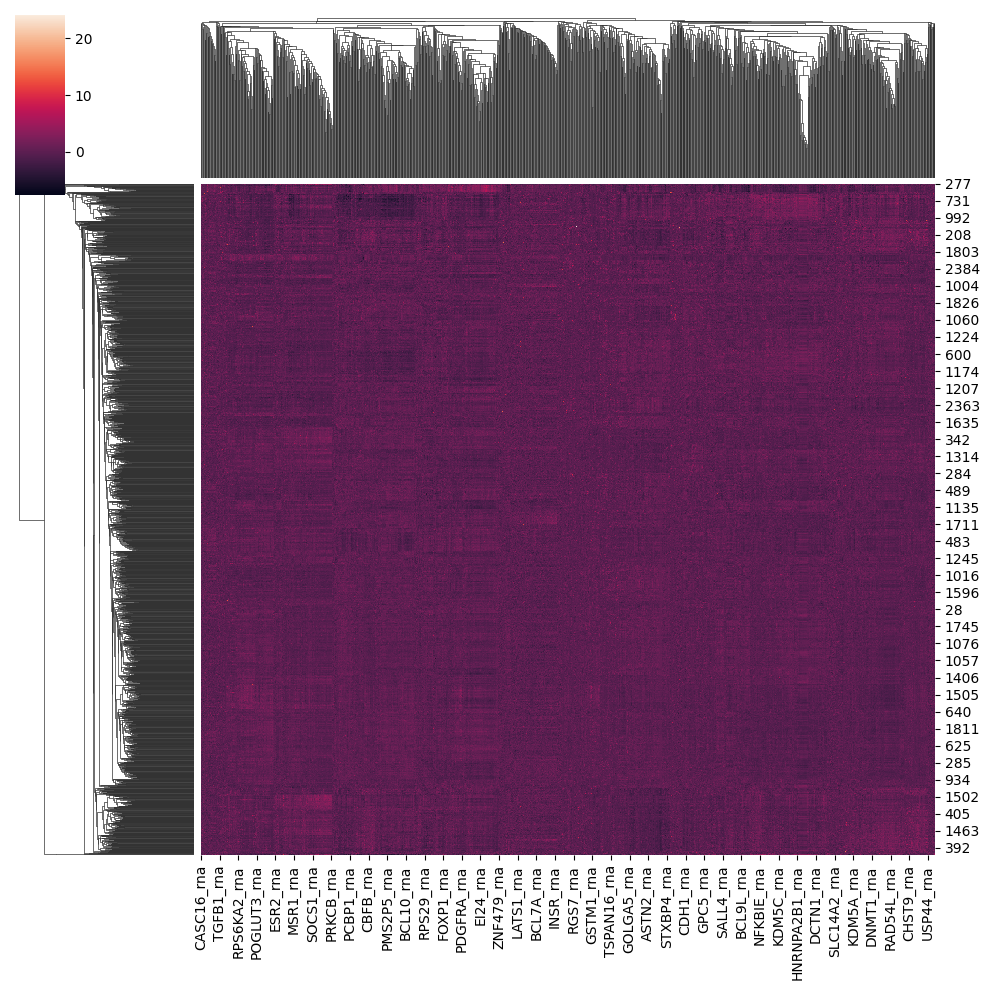

In [57]:
sns.clustermap(data_new[data_new.columns[1:]])

In [58]:
x = np.array(data_new[data_new.columns[1:]])
y = np.array(data_new['CANCER_TYPE_DETAILED'])

In [23]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_mutual_info_score as ami

In [59]:
clustering = AgglomerativeClustering(n_clusters=2).fit(x)#, metric= 'manhattan', linkage='single').fit(x)
clustering.labels_


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
ami(clustering.labels_,y)

0.022098001018810154

In [39]:
y

array(['Breast Invasive Ductal Carcinoma',
       'Breast Invasive Ductal Carcinoma',
       'Breast Mixed Ductal and Lobular Carcinoma', ...,
       'Breast Invasive Ductal Carcinoma',
       'Breast Invasive Ductal Carcinoma',
       'Breast Invasive Ductal Carcinoma'], dtype=object)

In [13]:
df = data[data.columns[:-1]]
d = df.values.reshape((1,len(d)*len(d[0])))

print(np.unique(d))

[-2. -1.  0.  1.  2.  3.  4.  5.  6. 11. nan]


In [14]:
df.astype(float)

,AKAP9_mut,AKT1_mut,AKT2_mut,ALK_mut,APC_mut,ARID1A_mut,ARID1B_mut,ARID2_mut,ASXL1_mut,ASXL2_mut,...,ZNF429_cna,ZNF439_cna,ZNF479_cna,ZNF521_cna,ZNF577_cna,ZNF805_cna,ZNRF3_cna,ZRSR2_cna,ZSCAN25_cna,ZZEF1_cna
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,0.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,-1.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2300,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,2.0,0.0,0.0
2301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.0,1.0,-1.0
2303,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0


In [15]:
type(np.unique(d)[-1]) #== None

numpy.float64

In [17]:
np.nan is np.unique(d)[-1]

False

In [19]:
np.nan in data

False

In [22]:
df.isnull().values.any()

True

In [23]:
 np.where(data==6)

(array([1653], dtype=int64), array([52], dtype=int64))

In [24]:
np.where(data.iloc[1653]==6)

(array([52], dtype=int64),)

In [32]:
data.iloc[999]#[52]

AKAP9_mut                                            0.0
AKT1_mut                                             0.0
AKT2_mut                                             0.0
ALK_mut                                              0.0
APC_mut                                              0.0
                                      ...               
ZNRF3_cna                                            0.0
ZRSR2_cna                                            0.0
ZSCAN25_cna                                          0.0
ZZEF1_cna                                            0.0
CANCER_TYPE_DETAILED    Breast Invasive Ductal Carcinoma
Name: 999, Length: 1323, dtype: object

In [33]:
cols = data.columns

In [34]:
cols[52]

'MUC16_mut'

In [40]:
data[cols[50:55]].iloc[995:1005]

,MEN1_mut,MTAP_mut,MUC16_mut,MYH9_mut,NCOA3_mut
995,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,1.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0
999,0.0,0.0,11.0,1.0,1.0
1000,0.0,0.0,1.0,0.0,0.0
1001,0.0,0.0,1.0,0.0,0.0
1002,0.0,0.0,2.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0


In [43]:
np.nan in data.values

False

In [19]:
data[data.columns[:-1]].min().unique()

array([ 0., -1., -2.])

In [18]:
data[data.columns[:-1]].max().unique()

array([ 2.,  1.,  3.,  5.,  4., 11.])